In [1]:
import matplotlib.pyplot as plt
import numpy as np

def entropy(p):
    
    H = -p*np.log(p) - (1-p)*np.log(1-p) - p
    
    return H

def prob_stimulus(param, SOA):
    
    amp = 0.96
    TBW = param[0]
    PSS = param[1]
    SD = (TBW-PSS)/np.log(4)
    
    return amp * np.exp(-((SOA-PSS)/SD)**2/2)

In [ ]:
nSOA = 1000
nTrials = 50
nStim = 1
SOA = np.linspace(-400,400,nSOA) # ms

nVal = 21
nPar = 2 # TWB, PSS
nVec = nVal**nPar
param_space = np.ones((nVal,nPar))
param_space[:,0] = np.linspace(100,200,nVal)    # TWB (ms)
param_space[:,1] = np.linspace(0,10,nVal)       # PSS (ms)

param_vector = np.ones((nVec,nPar))
param_vector[:,0] = np.repeat(param_space[:,0],nVal)
param_vector[:,1] = np.tile(param_space[:,1],nVal)

prior = np.ones(nVec)/nVec # flat prior

for trial in range(nTrials):
    
    info_stimulus = np.zeros([nSOA])
    for stim in range(nSOA):
        
        prob_stimulus_sync = 0
        for vec in range(nVec):
            prob_stimulus_sync += prior[vec]*prob_stimulus(param_vector[vec], SOA[stim])
            
        info_stimulus[stim] = entropy(prob_stimulus_sync)
        
    best_stim = np.argsort(info_stimulus)
    next_stim = best_stim[-1]
    
    # SHOW STIMULUS AND COLLECT RESPONSE (correct = True, False)
    ext = input(f'Enter True or False, SOA { SOA[next_stim] }: ')
    correct = bool(ext)
    
    prob_correct = np.ones(nVec)
    for vec in range(nVec):
        tmp = prob_stimulus(param_vector[vec], SOA[next_stim])
        if correct:
            prob_correct[vec] = tmp
        else:
            prob_correct[vec] = 1 - tmp
            
    posterior = np.multiply(prob_correct,prior) / np.sum(np.multiply(prob_correct,prior))
    prior = posterior

Enter True or False, SOA 170.97097097097105: 1
Enter True or False, SOA -178.97897897897897: 0
Enter True or False, SOA 200.60060060060061: 0
Enter True or False, SOA 207.80780780780788: 0
Enter True or False, SOA 212.61261261261268: 0
Enter True or False, SOA 215.81581581581588: 0
Enter True or False, SOA -208.6086086086086: 0
Enter True or False, SOA 219.81981981981983: 0
Enter True or False, SOA 221.42142142142143: 0
Enter True or False, SOA 222.22222222222229: 0
Enter True or False, SOA -214.2142142142142: 0
Enter True or False, SOA 223.8238238238239: 1
Enter True or False, SOA 224.62462462462463: 1
Enter True or False, SOA -216.6166166166166: 1
Enter True or False, SOA -217.4174174174174: 1
Enter True or False, SOA -218.2182182182182: 1
Enter True or False, SOA -219.019019019019: 1
Enter True or False, SOA -219.8198198198198: 1
Enter True or False, SOA 227.0270270270271: 0


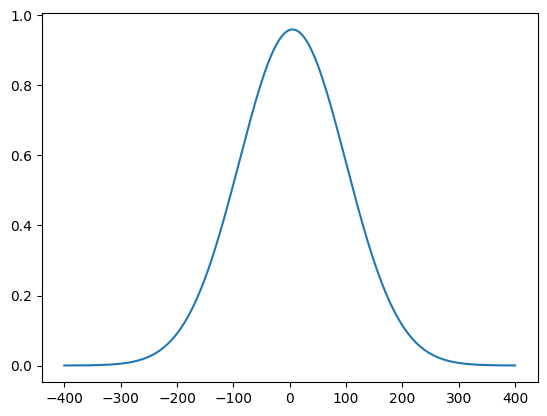

In [21]:
amp = 0.96
PSS = 5
TBW = 136

SD = (TBW-PSS)/np.log(4)
P = amp * np.exp(-((SOA-PSS)/SD)**2/2)

plt.plot(SOA,P)

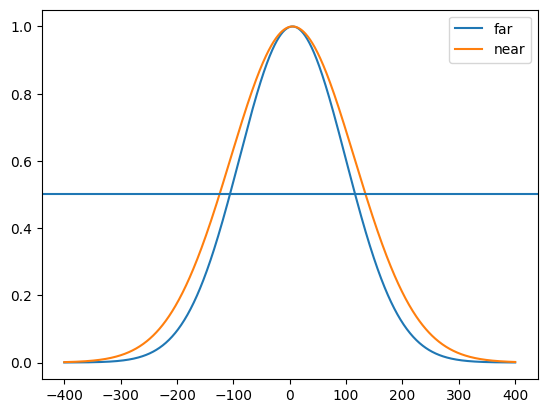

In [20]:
N = 1000

SOA = np.linspace(-400,400,N) # STIMULUS ONSET ASYNCHRONY (ms)

near = 60 # cm - TBW = 156.34 ms - PSS = 3.72 ms
far = 140 # cm - TBW = 136.34 ms - PSS = 5.49 ms

# from experiment

amp = 1
PSS_far = 5.49 # POINT SUBJECTIVE SIMULTANEITY
PSS_near = 3.72
TBW_far = 136.34 # TEMPORAL BINDING WINDOW
TBW_near = 156.34

SD = (TBW_far-PSS_far)/np.log(4)
P_far = amp * np.exp(-((SOA-PSS_far)/SD)**2/2)
SD = (TBW_near-PSS_near)/np.log(4)
P_near = amp * np.exp(-((SOA-PSSnear)/SD)**2/2)

plt.plot(SOA,P_far,label='far')
plt.plot(SOA,P_near,label='near')
plt.axhline(0.5)
plt.legend()

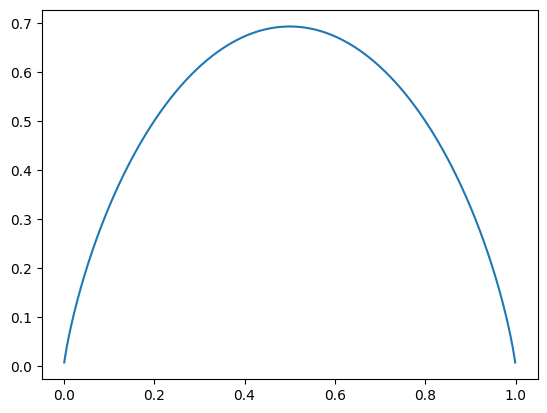

In [5]:
p = np.linspace(0.001,0.999,10000)
H = -p*np.log(p) - (1-p)*np.log(1-p)

plt.plot(p,H)

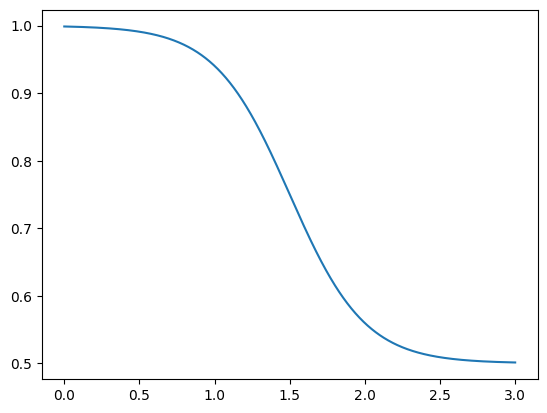

In [16]:
t = np.linspace(0,3,1000)
p = 1 - np.divide(0.5, 1+np.exp((1.5-t) / 0.25))

plt.plot(t,p)

In [ ]:
nSam = 100

paramIndicies = numpy.random.choice(numpy.arange(nVec), nSam, p=self.probabilities[:,0])

# calculate probabilities for all stimuli with all samples of parameters

stimIndicies = numpy.arange(self.stimComboCount)
p = self._pmeas(paramIndicies, stimIndicies)

# Determine amount of information to be gained
pbar = sum(p)/nSam
hbar = sum(entropy(p))/nSam
gain = entropy(pbar)-hbar